## Titanic Data Set Exploration/Predections

**The primary goal here would be to predict survived/deceased state of a person on the Titanic.**

In the process of doing so we will be going through:
1. Data Cleaning
2. Feature Engineering
3. EDA with visualizations
4. Trying out different ML algorithms for predection

Let's start by importing few essential libraries. Libraries will also be imported as and when required.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Without data how can we proceed further ??**

So, let's get the data (training data) into a dataframe. 

In [2]:
train = pd.read_csv('Data/train.csv');
test = pd.read_csv('Data/test.csv');

Now we should check the information the data has. 

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## Basic Info from the data
**PassengerId:** passenger Id

**Survived:** Survived or Not

**Pclass:** Class of Travel

**Name:** Name of Passenger

**Sex:** Gender

**Age:** Age of Passengers

**SibSp:** Number of Sibling/Spouse aboard

**Parch:** Number of Parent/Child aboard

**Ticket:** Ticket Id

**Fare:** Fare amount in dolars

**Cabin:** Alloted Cabin

**Embarked:** The port in which a passenger has embarked. C - Cherbourg, S - Southampton, Q = Queenstown

## Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!

### Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

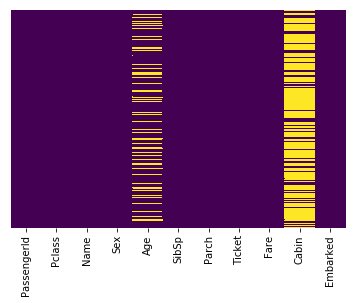

In [5]:
sns.heatmap(train.drop('Survived', axis=1).isnull(), yticklabels=False, cbar=False, cmap='viridis',)

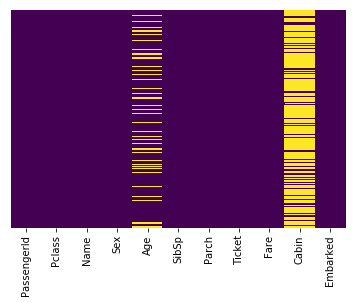

In [6]:
sns.heatmap(test.isnull(), yticklabels=False, cbar=False, cmap='viridis',)

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

Let's continue on by visualizing some more of the data.

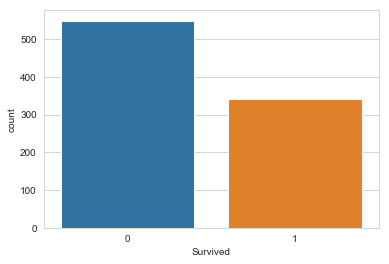

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train)

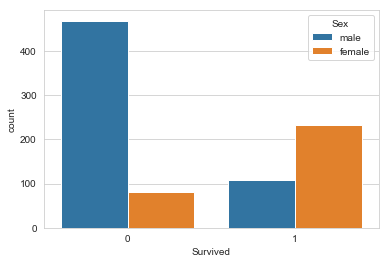

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=train)

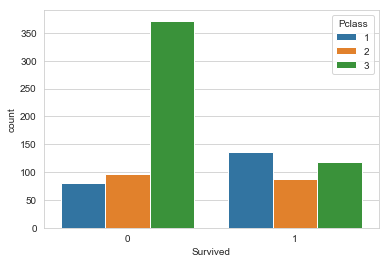

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=train)

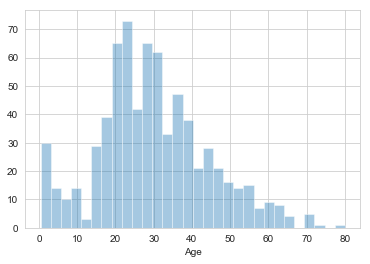

In [10]:
sns.distplot(train['Age'].dropna(), kde=False, bins=30)

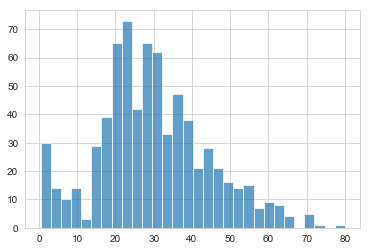

In [11]:
train['Age'].hist(bins=30, alpha=0.7)

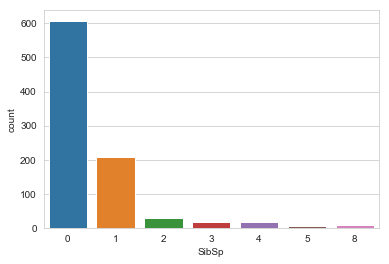

In [12]:
sns.countplot(x='SibSp', data=train)

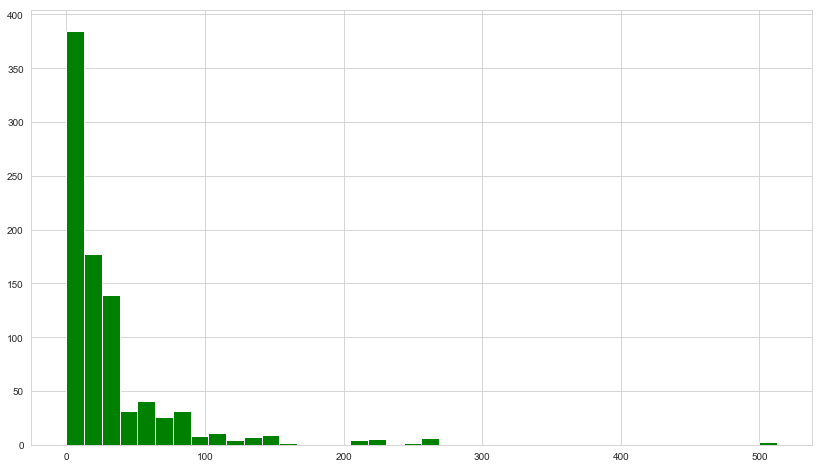

In [13]:
train['Fare'].hist(color='green', bins=40, figsize=(14, 8))

___
### Data Cleaning | Feature Engineering

The cleaning process will be done for both tain and test data. 

Let's start by Age attribute.

c:\users\saurav.pradhan\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


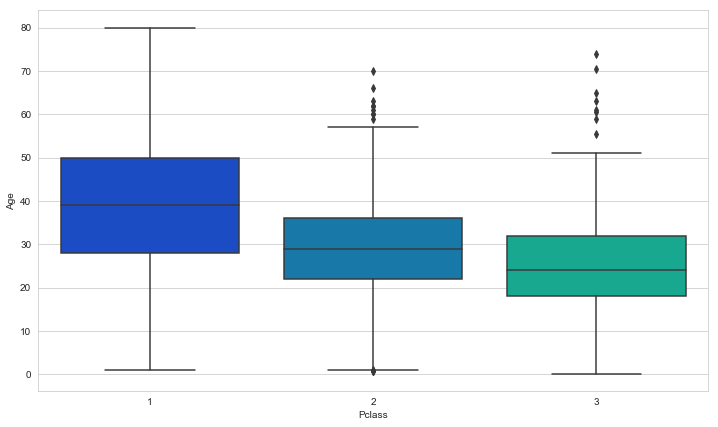

In [14]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=pd.concat([train, test], axis=0),palette='winter')

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [15]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [16]:
train['Age'][np.isnan(train['Age'])] = train[['Age', 'Pclass']][np.isnan(train['Age'])].apply(impute_age,axis=1)

test['Age'][np.isnan(test['Age'])] = test[['Age', 'Pclass']][np.isnan(test['Age'])].apply(impute_age,axis=1)

c:\users\saurav.pradhan\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\saurav.pradhan\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Let's drop the **Cabin** attribute as most of the data are missing.

In [19]:
train.drop('Cabin',axis=1,inplace=True)
test.drop('Cabin',axis=1,inplace=True)

In [20]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [21]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


## Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [22]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [23]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [24]:
train = pd.concat([train,sex,embark],axis=1)

In [25]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


Now our training data is ready. Let's make test data ready.

In [26]:
sex = pd.get_dummies(test['Sex'],drop_first=True)
embark = pd.get_dummies(test['Embarked'],drop_first=True)

test.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

test = pd.concat([test,sex,embark],axis=1)

test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


We have missing values in Fare attribute in test data. Let's fill it with median value.

In [27]:
test['Fare'] = test['Fare'].fillna(test['Fare'].median())

test['Fare'].isnull().sum()

0

Great! Now data is ready, we can now train a model and do the predictions.

# Prediction Process

Let's try different algorithms to evaluate a good prediction score.

In [28]:
train_features = train.drop('Survived', axis=1);
train_target = train['Survived']

### Train Test  Split

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.20, 
                                                    random_state=101)

### 1. Logistic Model

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

c:\users\saurav.pradhan\appdata\local\programs\python\python35\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [33]:
predictions = logmodel.predict(X_test)

In [34]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [35]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))
print('\n')
print(accuracy_score(y_test,predictions))

[[88 11]
 [24 56]]


              precision    recall  f1-score   support

           0       0.79      0.89      0.83        99
           1       0.84      0.70      0.76        80

   micro avg       0.80      0.80      0.80       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.80      0.80       179



0.8044692737430168


### 2. Naive Bayes

In [36]:
from sklearn.naive_bayes import MultinomialNB

In [37]:
NBModel = MultinomialNB().fit(X_train,y_train)

In [38]:
predictions = NBModel.predict(X_test)

In [39]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))
print('\n')
print(accuracy_score(y_test,predictions))

[[81 18]
 [39 41]]


              precision    recall  f1-score   support

           0       0.68      0.82      0.74        99
           1       0.69      0.51      0.59        80

   micro avg       0.68      0.68      0.68       179
   macro avg       0.68      0.67      0.66       179
weighted avg       0.68      0.68      0.67       179



0.6815642458100558


### 3. SVM

In [40]:
from sklearn.svm import SVC

In [41]:
model = SVC()

In [42]:
model.fit(X_train, y_train)

c:\users\saurav.pradhan\appdata\local\programs\python\python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [43]:
predictions = model.predict(X_test)

In [44]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))
print('\n')
print(accuracy_score(y_test,predictions))

[[98  1]
 [79  1]]


              precision    recall  f1-score   support

           0       0.55      0.99      0.71        99
           1       0.50      0.01      0.02        80

   micro avg       0.55      0.55      0.55       179
   macro avg       0.53      0.50      0.37       179
weighted avg       0.53      0.55      0.40       179



0.553072625698324


In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
param_grid = {'C':[0.1,1,10,100,1000], 'gamma':[1,0.1,0.01,0.001,0.0001]}

In [47]:
grid = GridSearchCV(SVC(), param_grid, verbose=3)

In [48]:
grid.fit(X_train, y_train)

c:\users\saurav.pradhan\appdata\local\programs\python\python35\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......... C=0.1, gamma=1, score=0.6302521008403361, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......... C=0.1, gamma=1, score=0.6329113924050633, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......... C=0.1, gamma=1, score=0.6329113924050633, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....... C=0.1, gamma=0.1, score=0.6302521008403361, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....... C=0.1, gamma=0.1, score=0.6329113924050633, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....... C=0.1, gamma=0.1, score=0.6329113924050633, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...... C=0.

[CV] ..... C=100, gamma=0.0001, score=0.634453781512605, total=   0.0s
[CV] C=100, gamma=0.0001 .............................................
[CV] .... C=100, gamma=0.0001, score=0.6666666666666666, total=   0.0s
[CV] C=100, gamma=0.0001 .............................................
[CV] ..... C=100, gamma=0.0001, score=0.679324894514768, total=   0.0s
[CV] C=1000, gamma=1 .................................................
[CV] ........ C=1000, gamma=1, score=0.6302521008403361, total=   0.0s
[CV] C=1000, gamma=1 .................................................
[CV] ........ C=1000, gamma=1, score=0.6329113924050633, total=   0.0s
[CV] C=1000, gamma=1 .................................................
[CV] ........ C=1000, gamma=1, score=0.6329113924050633, total=   0.0s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ...... C=1000, gamma=0.1, score=0.6092436974789915, total=   0.0s
[CV] C=1000, gamma=0.1 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    3.3s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [49]:
grid_predections = grid.predict(X_test)

In [50]:
print(confusion_matrix(y_test, grid_predections))
print('\n')
print(classification_report(y_test, grid_predections))
print('\n')
print(accuracy_score(y_test,grid_predections))

[[86 13]
 [30 50]]


              precision    recall  f1-score   support

           0       0.74      0.87      0.80        99
           1       0.79      0.62      0.70        80

   micro avg       0.76      0.76      0.76       179
   macro avg       0.77      0.75      0.75       179
weighted avg       0.76      0.76      0.75       179



0.7597765363128491


### 3. RFC

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
rfc = RandomForestClassifier(n_estimators=200)

In [53]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [54]:
rfc_pred = rfc.predict(X_test)

In [55]:
print(confusion_matrix(y_test, rfc_pred))
print('\n')
print(classification_report(y_test, rfc_pred))
print('\n')
print(accuracy_score(y_test,rfc_pred))

[[92  7]
 [24 56]]


              precision    recall  f1-score   support

           0       0.79      0.93      0.86        99
           1       0.89      0.70      0.78        80

   micro avg       0.83      0.83      0.83       179
   macro avg       0.84      0.81      0.82       179
weighted avg       0.84      0.83      0.82       179



0.8268156424581006


We can see that we're getting good accuracy rate with RFC so let's train this with the complete training data.

In [56]:
RFC_Model = RandomForestClassifier(n_estimators=200)

In [57]:
RFC_Model.fit(train_features, train_target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [58]:
predictions = RFC_Model.predict(test)

In [59]:
df = pd.concat([test['PassengerId'], pd.DataFrame(predictions, columns= ['Survived'])], axis=1)

In [60]:
df.head(15)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0


In [61]:
df.to_csv('Survival_predictions', index=False)

In [62]:
logmodel = LogisticRegression()

In [63]:
logmodel.fit(train_features, train_target)

c:\users\saurav.pradhan\appdata\local\programs\python\python35\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [64]:
predictions = logmodel.predict(test)

In [65]:
df = pd.concat([test['PassengerId'], pd.DataFrame(predictions, columns= ['Survived'])], axis=1)

In [66]:
df.head(15)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [67]:
df.to_csv('Survival_predictions', index=False)